In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 



Lấy dữ liệu 


In [2]:
data_df = pd.read_csv(r"D:\machine_learning\jupiter\notebook\Data_Dubao.csv")
print(data_df.isnull().sum())
data_df = data_df.dropna()

Airline              0
Date_of_Journey      0
Source               0
Destination          0
Route                1
Dep_Time             0
Arrival_Time         0
Duration(minutes)    0
Total_Stops          1
Additional_Info      0
Price                0
type                 0
dtype: int64


In [34]:
data_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration(minutes),Total_Stops,Additional_Info,Price,type
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,0 days 22:20:00,01:10 22 Mar,170,non-stop,No info,3897,economy class
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,0 days 05:50:00,13:15,445,2 stops,No info,7662,business class
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,0 days 09:25:00,04:25 10 Jun,1140,2 stops,No info,13882,business class
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,0 days 18:05:00,23:30,325,1 stop,No info,6218,business class
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,0 days 16:50:00,21:35,285,1 stop,No info,13302,business class


Chọn đặc trưng 


In [4]:
features = ['Airline','Dep_Time','Duration(minutes)','Total_Stops','Price']

In [5]:
x = data_df[features]
y = data_df['type']
y = pd.DataFrame(y, columns=['type'])

In [6]:
x.head()

,Airline,Dep_Time,Duration(minutes),Total_Stops,Price
0,IndiGo,0 days 22:20:00,170,non-stop,3897
1,Air India,0 days 05:50:00,445,2 stops,7662
2,Jet Airways,0 days 09:25:00,1140,2 stops,13882
3,IndiGo,0 days 18:05:00,325,1 stop,6218
4,IndiGo,0 days 16:50:00,285,1 stop,13302


In [7]:
y.head()

,type
0,economy class
1,business class
2,business class
3,business class
4,business class


Mã hóa dữ liệu


In [8]:
unique_values = data_df['Total_Stops'].unique()
unique_values

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [9]:
from sklearn.preprocessing import OrdinalEncoder 

Encoder = OrdinalEncoder(categories=[['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet']]) 
                                  
x['Airline']= Encoder.fit_transform(x[['Airline']])



C:\Users\doman\AppData\Local\Temp\ipykernel_2348\3500123625.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Airline']= Encoder.fit_transform(x[['Airline']])


In [10]:
from sklearn.preprocessing import OrdinalEncoder 
value_dung = ['non-stop', '2 stops', '1 stop', '3 stops', '4 stops']
# x['Total_Stops'] = x['Total_Stops'].apply(lambda i: i if i in value_dung else "Nav")

Encoder1 = OrdinalEncoder(categories=[['non-stop', '1 stop', '2 stops', '3 stops', '4 stops']]) 
                                  
x['Total_Stops']= Encoder1.fit_transform(x[['Total_Stops']])

C:\Users\doman\AppData\Local\Temp\ipykernel_2348\1251158949.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Total_Stops']= Encoder1.fit_transform(x[['Total_Stops']])


In [11]:
from sklearn.preprocessing import OrdinalEncoder 

Encoder2 = OrdinalEncoder(categories=[['economy class','business class']]) 
                                  
y['type'] = Encoder2.fit_transform(y[['type']])


In [12]:
x['Dep_Time'] = pd.to_timedelta(x['Dep_Time'])


C:\Users\doman\AppData\Local\Temp\ipykernel_2348\564286177.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Dep_Time'] = pd.to_timedelta(x['Dep_Time'])


In [13]:
x['Dep_Time'] = x['Dep_Time'].dt.total_seconds()/60

C:\Users\doman\AppData\Local\Temp\ipykernel_2348\256703345.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Dep_Time'] = x['Dep_Time'].dt.total_seconds()/60


In [14]:
x

,Airline,Dep_Time,Duration(minutes),Total_Stops,Price
0,0.0,1340.0,170,0.0,3897
1,1.0,350.0,445,2.0,7662
2,2.0,565.0,1140,2.0,13882
3,0.0,1085.0,325,1.0,6218
4,0.0,1010.0,285,1.0,13302
...,...,...,...,...,...
10678,7.0,1195.0,150,0.0,4107
10679,1.0,1245.0,155,0.0,4145
10680,2.0,500.0,180,0.0,7229
10681,6.0,690.0,160,0.0,12648


In [15]:
y

,type
0,0.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
10678,0.0
10679,0.0
10680,0.0
10681,1.0


Tách dữ liệu

In [16]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.9,test_size=0.1,random_state=12) 

In [17]:
x_train.shape


(9613, 5)

In [18]:
x_test.shape

(1069, 5)



# 1 Perceptron

In [19]:
from sklearn.linear_model import Perceptron
percep_model = Perceptron(random_state=12)

percep_model.fit(x_train,y_train)



d:\machine_learning\jupiter\venv\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Perceptron(random_state=12)

In [20]:
y_dudoan = percep_model.predict(x_test)
y_dudoan = pd.Series(y_dudoan)

y_dudoan

0       0.0
1       1.0
2       1.0
3       0.0
4       1.0
       ... 
1064    0.0
1065    1.0
1066    1.0
1067    1.0
1068    1.0
Length: 1069, dtype: float64

In [21]:
y_test_series = y_test['type']
y_dudoan_series = y_dudoan

In [22]:
y_test_array = y_test_series.to_numpy()
y_dudoan_array =y_dudoan_series.to_numpy()


In [23]:
pd.DataFrame({'y':y_test_array,'y_dudoan':y_dudoan_array})

,y,y_dudoan
0,0.0,0.0
1,1.0,1.0
2,1.0,1.0
3,0.0,0.0
4,1.0,1.0
...,...,...
1064,0.0,0.0
1065,1.0,1.0
1066,0.0,1.0
1067,0.0,1.0


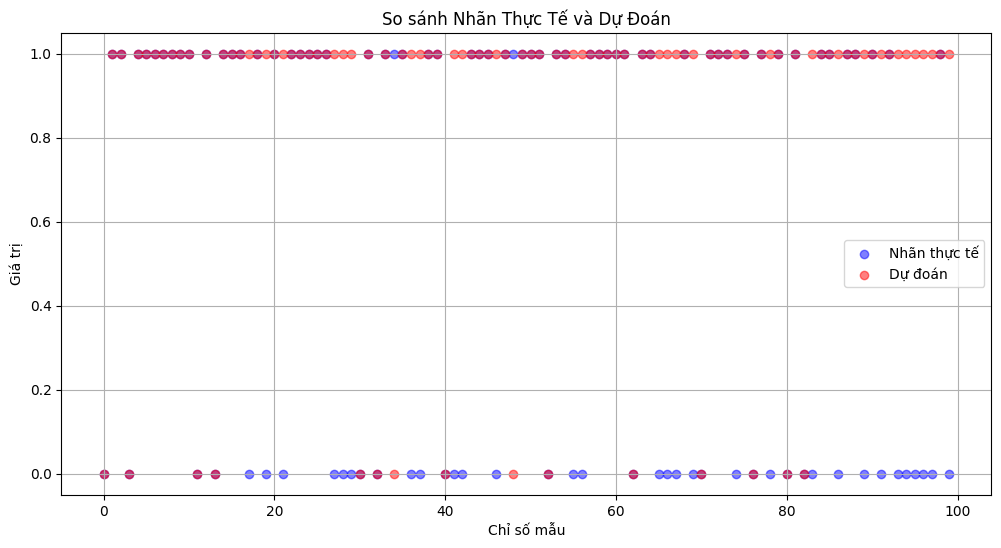

Độ chính xác:  0.7221702525724977


In [24]:

plt.figure(figsize=(12, 6))


plt.scatter(range(len(y_test[:100])), y_test[:100], label='Nhãn thực tế', color='blue', alpha=0.5)
plt.scatter(range(len(y_dudoan[:100])), y_dudoan[:100], label='Dự đoán', color='red', alpha=0.5)

plt.title('So sánh Nhãn Thực Tế và Dự Đoán')
plt.xlabel('Chỉ số mẫu')
plt.ylabel('Giá trị')
plt.legend()
plt.grid()
plt.show()
accuracy = np.mean(y_test_array == y_dudoan_array)
print("Độ chính xác: ",accuracy)
a = accuracy



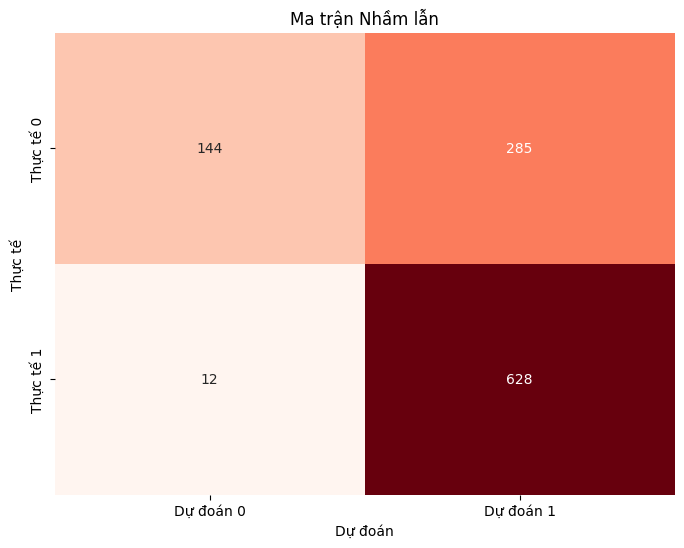

In [25]:
import seaborn as sns
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(y_test, y_dudoan)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False,
            xticklabels=['Dự đoán 0', 'Dự đoán 1'],
            yticklabels=['Thực tế 0', 'Thực tế 1'])
plt.title('Ma trận Nhầm lẫn')
plt.xlabel('Dự đoán')
plt.ylabel('Thực tế')
plt.show()

In [26]:
percep_model.predict([[12,345,100000,2,5000]])


d:\machine_learning\jupiter\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


array([1.])

In [27]:
from sklearn.metrics import classification_report
print("PLA Classification Report:")
print(classification_report(y_test, y_dudoan))


PLA Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.34      0.49       429
         1.0       0.69      0.98      0.81       640

    accuracy                           0.72      1069
   macro avg       0.81      0.66      0.65      1069
weighted avg       0.78      0.72      0.68      1069



In [28]:
import joblib

# Lưu mô hình sau khi đã huấn luyện xong
joblib.dump(percep_model, 'pla_model.pkl')


['pla_model.pkl']

# 2 ID3


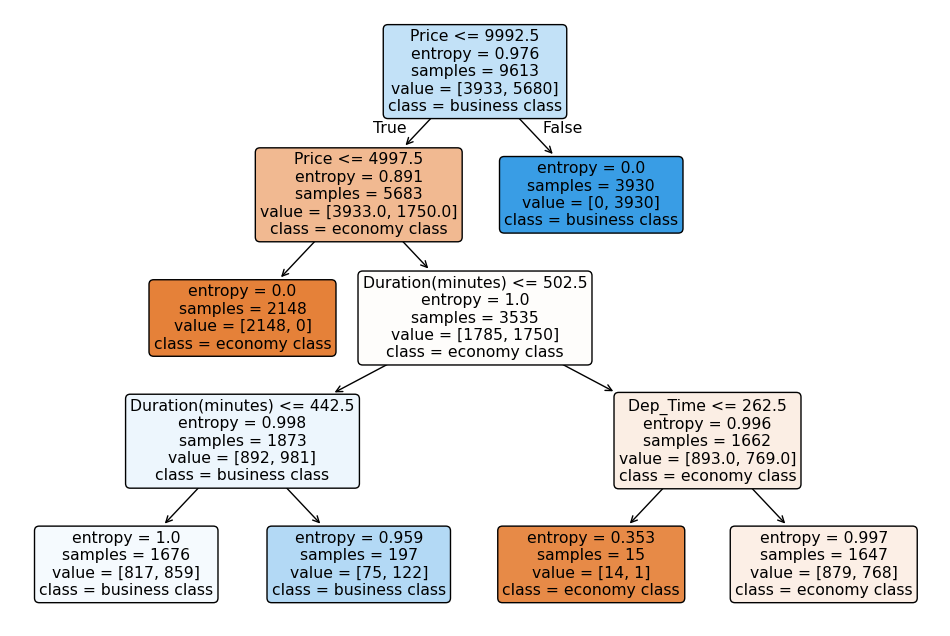

Độ chính xác của mô hình ID3: 0.83
ID3 Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      0.77      0.78       429
         1.0       0.85      0.86      0.86       640

    accuracy                           0.83      1069
   macro avg       0.82      0.82      0.82      1069
weighted avg       0.83      0.83      0.83      1069



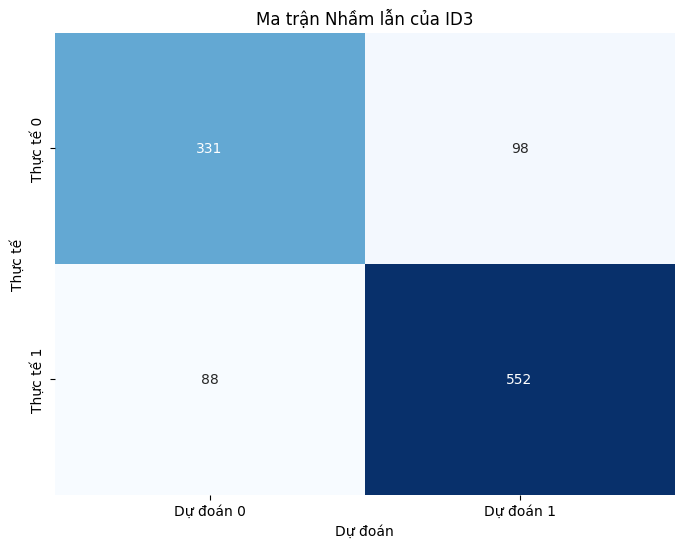

Dự đoán lớp: [0.]


d:\machine_learning\jupiter\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [29]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
id3 = DecisionTreeClassifier(criterion='entropy',max_depth=4, random_state=12)
id3.fit(x_train, y_train)
joblib.dump(id3, 'id3.pkl')
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(12,8))
tree.plot_tree(id3, filled=True, feature_names=features, class_names=['economy class', 'business class'], rounded=True)
plt.show()

y_id3_predict = id3.predict(x_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Đánh giá độ chính xác
accuracy_id3 = accuracy_score(y_test, y_id3_predict)
print(f"Độ chính xác của mô hình ID3: {accuracy_id3:.2f}")
b = accuracy_id3
# Báo cáo phân loại
print("ID3 Classification Report:")
print(classification_report(y_test, y_id3_predict))

# Vẽ ma trận nhầm lẫn
cm_id3 = confusion_matrix(y_test, y_id3_predict)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_id3, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Dự đoán 0', 'Dự đoán 1'],
            yticklabels=['Thực tế 0', 'Thực tế 1'])
plt.title('Ma trận Nhầm lẫn của ID3')
plt.xlabel('Dự đoán')
plt.ylabel('Thực tế')
plt.show()
new_data = [[0, 345, 10000, 2, 5000]]  # Các giá trị này cần phù hợp với định dạng dữ liệu đã huấn luyện
prediction = id3.predict(new_data)
print(f"Dự đoán lớp: {prediction}")

# 3 Neural_network

d:\machine_learning\jupiter\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
301/301 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5297 - loss: 226.2295 - val_accuracy: 0.4210 - val_loss: 0.6872
Epoch 2/50
301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5439 - loss: 5.3507 - val_accuracy: 0.4219 - val_loss: 0.6866
Epoch 3/50
301/301 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5400 - loss: 2.0422 - val_accuracy: 0.7343 - val_loss: 0.5907
Epoch 4/50
301/301 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5586 - loss: 1.1646 - val_accuracy: 0.8017 - val_loss: 0.6228
Epoch 5/50
301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5439 - loss: 0.8304 - val_accuracy: 0.6277 - val_loss: 0.5906
Epoch 6/50
301/301 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5464 - loss: 0.9218 - val_accuracy: 0.7194 - val_loss: 0.6222
Epoch 7/50
301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5226 - loss: 0.7302 - val_accuracy: 0.7250 - val_loss: 0.6432
Epoch 8/50
301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5302 - loss: 0.6998 - val_accuracy: 

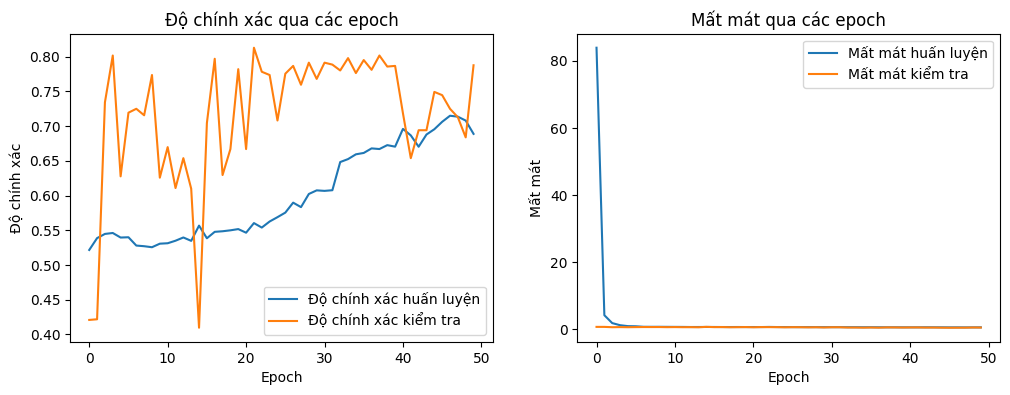

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7992 - loss: 0.4851
Độ chính xác trên tập kiểm tra: 78.77%
Độ chính xác:  0.7876520112254444


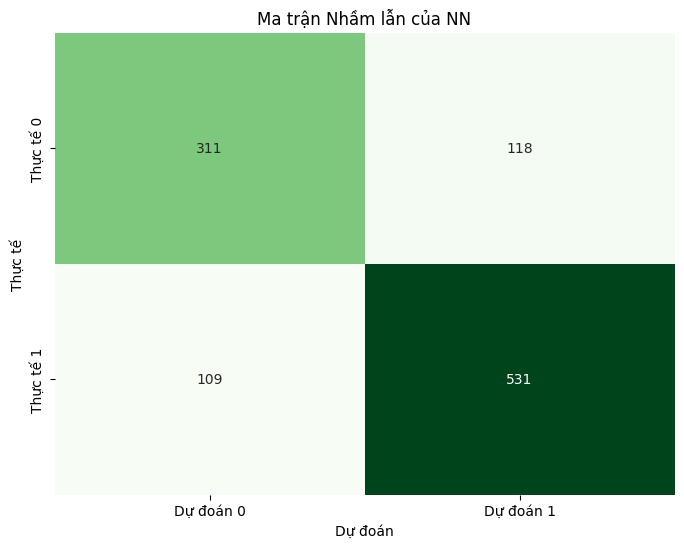

In [30]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Dense(64, input_dim=x_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  # Phân loại nhị phân
    
    # Biên dịch mô hình
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.002), metrics=['accuracy'])

model_boc = model
    # Huấn luyện mô hình
history = model.fit(x_train, y_train, epochs=50, batch_size=32,
                        validation_data=(x_test, y_test))
joblib.dump(model, 'Neural_Network.pkl')
    
    # Đánh giá mô hình
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Độ chính xác trên tập kiểm tra: {accuracy * 100:.2f}%')
    
    # Dự đoán kết quả
y_pred_prob = model.predict(x_test)
y_pred = (y_pred_prob > 0.5).astype(int)
comparison = pd.DataFrame({'Thực tế': y_test.to_numpy().flatten(), 'Dự đoán': y_pred.flatten()})
print(comparison.head())
    
    # Trực quan hóa lịch sử huấn luyện
plt.figure(figsize=(12, 4))
    
    # Độ chính xác
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Độ chính xác huấn luyện')
plt.plot(history.history['val_accuracy'], label='Độ chính xác kiểm tra')
plt.title('Độ chính xác qua các epoch')
plt.xlabel('Epoch')
plt.ylabel('Độ chính xác')
plt.legend()
    
    # Mất mát
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Mất mát huấn luyện')
plt.plot(history.history['val_loss'], label='Mất mát kiểm tra')
plt.title('Mất mát qua các epoch')
plt.xlabel('Epoch')
plt.ylabel('Mất mát')
plt.legend()
    
plt.show()

loss, accuracy = model.evaluate(x_test, y_test)
print(f'Độ chính xác trên tập kiểm tra: {accuracy * 100:.2f}%')
accuracy = np.mean(y_test == y_pred)
print("Độ chính xác: ",accuracy)
c = accuracy
cm_nn = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=['Dự đoán 0', 'Dự đoán 1'],
            yticklabels=['Thực tế 0', 'Thực tế 1'])
plt.title('Ma trận Nhầm lẫn của NN')
plt.xlabel('Dự đoán')
plt.ylabel('Thực tế')
plt.show()



# 4 Stacking

In [31]:
from sklearn.ensemble import StackingClassifier

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

def create_keras_model():
    model = Sequential()
    model.add(Dense(10, input_dim=5, activation='relu'))  # 4 features cho Iris
    model.add(Dense(3, activation='softmax'))  # 3 classes
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  # Compile model
    return model

    

keras_model = create_keras_model()
y_train_one_hot = to_categorical(y_train, num_classes=3)
y_test_one_hot = to_categorical(y_test, num_classes=3)
keras_model.fit(x_train, y_train_one_hot, epochs=25, batch_size=5, verbose=1)


y_dudoan_train = percep_model.predict(x_train)
y_id3_predict_train = id3.predict(x_train)
pred_keras_train = np.argmax(keras_model.predict(x_train), axis=-1)


# Tạo DataFrame cho các dự đoán
stacked_predictions_train = pd.DataFrame({
    'perceptron': y_dudoan_train,
    'decision_tree': y_id3_predict_train.flatten(),
    'mlp': pred_keras_train
})

final_model = DecisionTreeClassifier()
final_model.fit(stacked_predictions_train, y_train)
joblib.dump(final_model, 'stacking.pkl')

# Dự đoán trên tập kiểm tra

pred_keras_test = np.argmax(keras_model.predict(x_test), axis=-1)

stacked_predictions_test = pd.DataFrame({
    'perceptron': y_dudoan,
    'decision_tree': y_id3_predict,
    'mlp': pred_keras_test
})

# Dự đoán bằng mô hình cuối
y_pred_final = final_model.predict(stacked_predictions_test)

# Đánh giá mô hình
print("Accuracy Stacking:", accuracy_score(y_test, y_pred_final))
d = accuracy_score(y_test, y_pred_final)



d:\machine_learning\jupiter\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
1923/1923 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.5882 - loss: 146.1466
Epoch 2/25
1923/1923 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6891 - loss: 4.1889
Epoch 3/25
1923/1923 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6881 - loss: 4.1604
Epoch 4/25
1923/1923 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7072 - loss: 3.2117
Epoch 5/25
1923/1923 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6970 - loss: 4.1718
Epoch 6/25
1923/1923 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7036 - loss: 3.8576
Epoch 7/25
1923/1923 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7178 - loss: 3.6653
Epoch 8/25
1923/1923 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7128 - loss: 3.4443
Epoch 9/25
1923/1923 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7326 - loss: 2.7380
Epoch 10/25
1923/1923 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7061 - loss: 4.1681
Epoch 11/25
1923/1923 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7256 - loss: 2.9150
Epoch 12/25
1923/1923 ━━━━━━

In [32]:
print("Độ chính xác của Perceptron: ",a)
print("Độ chính xác của ID3: ",b)
print("Độ chính xác của Neural Network: ",c)
print("Độ chính xác của Stacking: ",d )

Độ chính xác của Perceptron:  0.7221702525724977
Độ chính xác của ID3:  0.8260056127221702
Độ chính xác của Neural Network:  0.7876520112254444
Độ chính xác của Stacking:  0.8269410664172123
